<a href="https://colab.research.google.com/github/kefasmanu/NLP-FELLOWSHIP/blob/main/week%206/day%201/NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generate and visualize the dataset

[-0.49596403  0.98498516]


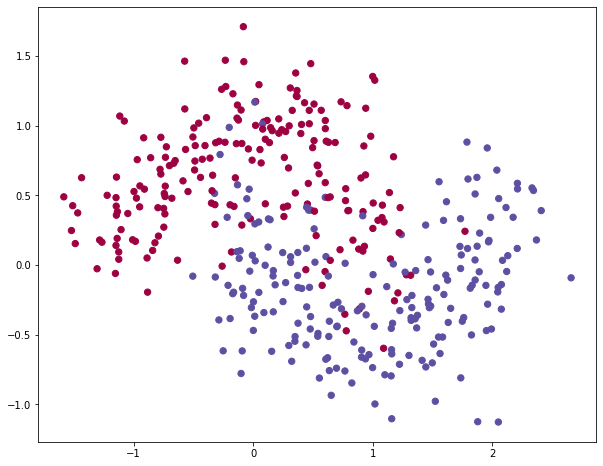

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(400, noise=0.30)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
print(X[0])

## Train model using logistic regression

In [3]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

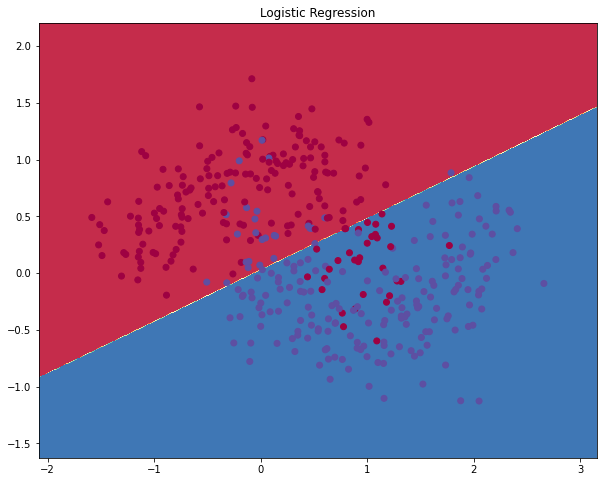

In [5]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

## Training Neural Network
The input and output layer nodes are determined by the dataset. We get to define the nodes in the hidden layer. The more the nodes the more complex functions we will be able fit. The model training will be computationally expensive.  A bigger number of parameters also means we become more prone to overfitting our data.

### Feedforward propagation

1. Calculate hidden layer input
2. Perform non-linear transformation on hidden linear input
3. Perform linear and non-linear transformation of hidden layer activation at output layer

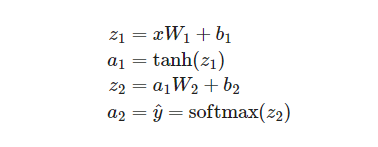


### Backward Propagation

1. Calculate gradient of Error(E) at output layer
2. Compute slope at output and hidden layer
3. Compute delta at output layer
4. Calculate Error at the hidden layer
5. Compute delta at hidden layer
6. Update weight at both output and hidden layer
7. Update biases at both output and hidden layer 

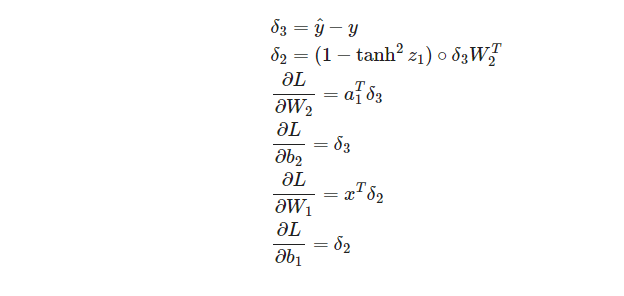


In [6]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [7]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [8]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

In [9]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

nn_hdim = 3

np.random.seed(0)
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b2 = np.zeros((1, nn_output_dim))


print(W1, b1, W2, b2)

[[ 1.24737338  0.28295388  0.69207227]
 [ 1.58455078  1.32056292 -0.69103982]] [[0. 0. 0.]] [[ 0.5485338  -0.08738612]
 [-0.05959343  0.23705916]
 [ 0.08316359  0.8396252 ]] [[0. 0.]]


In [10]:
X[0]

array([-0.49596403,  0.98498516])

In [11]:
z1 = X.dot(W1) + b1
a1 = np.tanh(z1)
z2 = a1.dot(W2) + b2
exp_scores = np.exp(z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

print(z1[0], a1[0], z2[0])
print(probs[0])
print(y[0])

[ 0.94210668  1.16039994 -1.02390692] [ 0.73618866  0.82117018 -0.77145306] [ 0.29073121 -0.5173982 ]
[0.69171075 0.30828925]
0


In [12]:
delta3 = probs
delta3[range(num_examples), y] -= 1
dW2 = (a1.T).dot(delta3)
db2 = np.sum(delta3, axis=0, keepdims=True)
delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
dW1 = np.dot(X.T, delta2)
db1 = np.sum(delta2, axis=0)



In [13]:
dW2 += reg_lambda * W2
dW1 += reg_lambda * W1

# Gradient descent parameter update
W1 += -epsilon * dW1
b1 += -epsilon * db1
W2 += -epsilon * dW2
b2 += -epsilon * db2

print(W1, b1, W2, b2)

[[ 1.01430539  0.4992915   0.86756006]
 [ 1.74591776  1.2345306  -0.92280961]] [[-0.08644394  0.06540471 -0.00763931]] [[ 0.41796188  0.04313969]
 [ 0.26392009 -0.08647211]
 [-0.64102001  1.56371652]] [[-0.12654352  0.12654352]]


Loss after iteration 0: 1.115970
Loss after iteration 1000: 0.238316
Loss after iteration 2000: 0.232129
Loss after iteration 3000: 0.230116
Loss after iteration 4000: 0.229276
Loss after iteration 5000: 0.228856
Loss after iteration 6000: 0.228606
Loss after iteration 7000: 0.228442
Loss after iteration 8000: 0.228329
Loss after iteration 9000: 0.228249
Loss after iteration 10000: 0.228190
Loss after iteration 11000: 0.228146
Loss after iteration 12000: 0.228113
Loss after iteration 13000: 0.228087
Loss after iteration 14000: 0.228066
Loss after iteration 15000: 0.228049
Loss after iteration 16000: 0.228035
Loss after iteration 17000: 0.228024
Loss after iteration 18000: 0.228014
Loss after iteration 19000: 0.228006


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

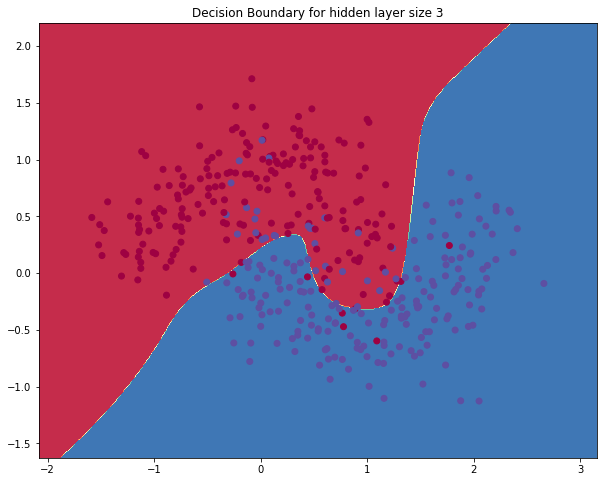

In [14]:
# Build a model with a 3-dimensional hidden layer
model = build_model(5, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()